# CanESM5 GMD paper Figure 9&10

### history
- NCS, setup basic example, 2019-05-1
- SJH, changes according to Michael's recommendations, 2019-05-13

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import cartopy.feature as cfeature
import cmocean
from cdo import *
import os
import modules.basic_stats as bst
import modules.plotting_module as pltm
import sqlite3
import datetime
import pickle

cdo = Cdo()
cdo.setCdo('/home/ords/crd/ccrn/scrd104/miniconda3/bin/cdo')

In [2]:
%store -r start 
%store -r end
%store -r title_fontsize
%store -r g0

In [3]:
# cdo remapping to the woa09 grid horizontal
# using woa09 instead of era5 b/c the high res grid of era5 makes subsequent data operations very slow
regrid=False

if regrid:
    ta_file='ta_Amon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc'
    ifile = os.path.join('input_data/CanESM5_cmip_dir/historical/r1i1p1f1/Amon/ta/gn/v20190429/', ta_file)
    ofile = 'input_data/processed_data/remap-woa09_' + ta_file
    cdo.remapbil('input_data/obs/woa/woa09/uncs_woa09_ann_tpot.nc', input=ifile, output=ofile, options='-L')
    
    ua_file='ua_Amon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc'
    ifile = os.path.join('input_data/CanESM5_cmip_dir/historical/r1i1p1f1/Amon/ua/gn/v20190429/', ua_file)
    ofile = 'input_data/processed_data/remap-woa09_' + ua_file
    cdo.remapbil('input_data/obs/woa/woa09/uncs_woa09_ann_tpot.nc', input=ifile, output=ofile, options='-L')
        
    va_file='va_Amon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc'
    ifile = os.path.join('input_data/CanESM5_cmip_dir/historical/r1i1p1f1/Amon/va/gn/v20190429/', va_file)
    ofile = 'input_data/processed_data/remap-woa09_' + va_file
    cdo.remapbil('input_data/obs/woa/woa09/uncs_woa09_ann_tpot.nc', input=ifile, output=ofile, options='-L')

    zg_file='zg_Amon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc'
    ifile = os.path.join('input_data/CanESM5_cmip_dir/historical/r1i1p1f1/Amon/zg/gn/v20190429/', zg_file)
    ofile = 'input_data/processed_data/remap-woa09_' + zg_file
    cdo.remapbil('input_data/obs/woa/woa09/uncs_woa09_ann_tpot.nc', input=ifile, output=ofile, options='-L')
    
    
    ta_obs_file='era5_ta_monthlymean_1979-2019.nc'
    ifile = os.path.join('input_data/obs/NEIL/era5/', ta_obs_file)
    ofile = 'input_data/processed_data/remap-woa09_' + ta_obs_file
    cdo.remapbil('input_data/obs/woa/woa09/uncs_woa09_ann_tpot.nc', input=ifile, output=ofile, options='-L')
    
    ua_obs_file='era5_ua_monthlymean_1979-2019.nc'
    ifile = os.path.join('input_data/obs/NEIL/era5/', ua_obs_file)
    ofile = 'input_data/processed_data/remap-woa09_' + ua_obs_file
    cdo.remapbil('input_data/obs/woa/woa09/uncs_woa09_ann_tpot.nc', input=ifile, output=ofile, options='-L')
    
    va_obs_file='era5_va_monthlymean_1979-2019.nc'
    ifile = os.path.join('input_data/obs/NEIL/era5/', va_obs_file)
    ofile = 'input_data/processed_data/remap-woa09_' + va_obs_file
    cdo.remapbil('input_data/obs/woa/woa09/uncs_woa09_ann_tpot.nc', input=ifile, output=ofile, options='-L')

    z_obs_file='era5_z_monthlymean_1979-2019.nc'
    ifile = os.path.join('input_data/obs/NEIL/era5/', z_obs_file)
    ofile = 'input_data/processed_data/remap-woa09_' + z_obs_file
    cdo.remapbil('input_data/obs/woa/woa09/uncs_woa09_ann_tpot.nc', input=ifile, output=ofile, options='-L')
    
    
    ta_file_CanESM2 = 'ta_Amon_CanESM2_historical-r1_r1i1p1_195001-202012.nc'    
    ifile = os.path.join('input_data/CanESM2_large_ensemble/historical-r1/mon/atmos/ta/r1i1p1/', ta_file_CanESM2)
    ofile = 'input_data/processed_data/remap-woa09_' + ta_file_CanESM2
    cdo.remapbil('input_data/obs/woa/woa09/uncs_woa09_ann_tpot.nc', input=ifile, output=ofile, options='-L')
    
    ua_file_CanESM2 = 'ua_Amon_CanESM2_historical-r1_r1i1p1_195001-202012.nc'    
    ifile = os.path.join('input_data/CanESM2_large_ensemble/historical-r1/mon/atmos/ua/r1i1p1/', ua_file_CanESM2)
    ofile = 'input_data/processed_data/remap-woa09_' + ua_file_CanESM2
    cdo.remapbil('input_data/obs/woa/woa09/uncs_woa09_ann_tpot.nc', input=ifile, output=ofile, options='-L')
    
    va_file_CanESM2 = 'va_Amon_CanESM2_historical-r1_r1i1p1_195001-202012.nc'    
    ifile = os.path.join('input_data/CanESM2_large_ensemble/historical-r1/mon/atmos/va/r1i1p1/', va_file_CanESM2)
    ofile = 'input_data/processed_data/remap-woa09_' + va_file_CanESM2
    cdo.remapbil('input_data/obs/woa/woa09/uncs_woa09_ann_tpot.nc', input=ifile, output=ofile, options='-L')

    zg_file_CanESM2 = 'zg_Amon_CanESM2_historical-r1_r1i1p1_195001-202012.nc'    
    ifile = os.path.join('input_data/CanESM2_large_ensemble/historical-r1/mon/atmos/zg/r1i1p1/', zg_file_CanESM2)
    ofile = 'input_data/processed_data/remap-woa09_' + zg_file_CanESM2
    cdo.remapbil('input_data/obs/woa/woa09/uncs_woa09_ann_tpot.nc', input=ifile, output=ofile, options='-L')
    
    

In [3]:
#open datasets and select time interval 
ta = xr.open_dataset('input_data/processed_data/remap-woa09_ta_Amon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc')['ta'].squeeze().sel(time=slice(start,end))
ua = xr.open_dataset('input_data/processed_data/remap-woa09_ua_Amon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc')['ua'].squeeze().sel(time=slice(start,end))
va = xr.open_dataset('input_data/processed_data/remap-woa09_va_Amon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc')['va'].squeeze().sel(time=slice(start,end))
zg = xr.open_dataset('input_data/processed_data/remap-woa09_zg_Amon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc')['zg'].squeeze().sel(time=slice(start,end))

ta_CanESM2 = xr.open_dataset('input_data/processed_data/remap-woa09_ta_Amon_CanESM2_historical-r1_r1i1p1_195001-202012.nc')['ta'].squeeze().sel(time=slice(start,end))
ua_CanESM2 = xr.open_dataset('input_data/processed_data/remap-woa09_ua_Amon_CanESM2_historical-r1_r1i1p1_195001-202012.nc')['ua'].squeeze().sel(time=slice(start,end))
va_CanESM2 = xr.open_dataset('input_data/processed_data/remap-woa09_va_Amon_CanESM2_historical-r1_r1i1p1_195001-202012.nc')['va'].squeeze().sel(time=slice(start,end))
zg_CanESM2 = xr.open_dataset('input_data/processed_data/remap-woa09_zg_Amon_CanESM2_historical-r1_r1i1p1_195001-202012.nc')['zg'].squeeze().sel(time=slice(start,end))

ta_obs = xr.open_dataset('input_data/processed_data/remap-woa09_era5_ta_monthlymean_1979-2019.nc')['t'].rename( {'level':'plev'}).squeeze().sel(time=slice(start,end))
ua_obs = xr.open_dataset('input_data/processed_data/remap-woa09_era5_ua_monthlymean_1979-2019.nc')['u'].rename( {'level':'plev'}).squeeze().sel(time=slice(start,end))
va_obs = xr.open_dataset('input_data/processed_data/remap-woa09_era5_va_monthlymean_1979-2019.nc')['v'].rename( {'level':'plev'}).squeeze().sel(time=slice(start,end))

#convert geopotential to geopotential height 
zg_obs = xr.open_dataset('input_data/processed_data/remap-woa09_era5_z_monthlymean_1979-2019.nc')['z'].rename( {'level':'plev'}).squeeze().sel(time=slice(start,end))/g0

#set model plev units to hPa (obs are already in hPa)
for ds in [ta,ua,va,zg,ta_CanESM2,ua_CanESM2,va_CanESM2,zg_CanESM2]:
    ds['plev'] = ds.plev/100.
   

In [5]:
#select common levels
clevels = np.intersect1d(ua_obs.plev,ua.plev)   

ta = ta.sel(plev=clevels)
ua = ua.sel(plev=clevels)
va = va.sel(plev=clevels)
zg = zg.sel(plev=clevels)

ta_CanESM2 = ta_CanESM2.sel(plev=clevels)
ua_CanESM2 = ua_CanESM2.sel(plev=clevels)
va_CanESM2 = va_CanESM2.sel(plev=clevels)
zg_CanESM2 = zg_CanESM2.sel(plev=clevels)

ta_obs = ta_obs.sel(plev=clevels)
ua_obs = ua_obs.sel(plev=clevels)
va_obs = va_obs.sel(plev=clevels)
zg_obs = zg_obs.sel(plev=clevels)

In [ ]:
#get zonal means
ta_zm = ta.mean(dim=['lon','time'])
ta_CanESM2_zm = ta_CanESM2.mean(dim=['lon','time'])
ta_obs_zm = ta_obs.mean(dim=['lon','time'])

ua_zm = ua.mean(dim=['lon', 'time'])
ua_CanESM2_zm = ua_CanESM2.mean(dim=['lon', 'time'])
ua_obs_zm = ua_obs.mean(dim=['lon', 'time'])

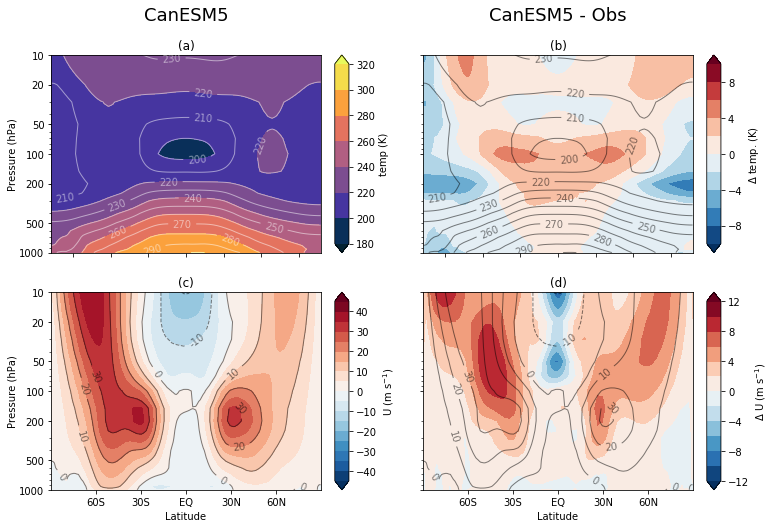

In [37]:
#plot zonal means
fig = plt.figure(figsize=(12, 8), constrained_layout=False)
title_fontsize = 18

# gridspec inside gridspec
outer_grid = fig.add_gridspec(2, 2, wspace=0.25, hspace=0.2)

# plot the ta
axt, axc = pltm.inner_gs(outer_grid[0], labely=True)
cmap=cmocean.cm.thermal
cmap.set_bad(cfeature.COLORS['land'])
cbt = axt.contourf(ta_zm.lat, ta_zm.plev, ta_zm, cmap=cmap, levels = np.arange(180,321,20), extend='both')
cntr = axt.contour(ta_zm.lat, ta_zm.plev, ta_zm, 10, colors='w', linewidths=1, alpha=0.5)
axt.clabel(cntr,fmt='%1.0f')
axt.set_title('(a)')
axt.text(0.5, 1.2, 'CanESM5', horizontalalignment='center', verticalalignment='center', fontsize=title_fontsize, transform=axt.transAxes)
plt.colorbar(cbt, cax=axc, extend='both', label =r'temp (K)')

# plot the ua
axt, axc = pltm.inner_gs(outer_grid[2], labely=True, labelx=True)
cmap=plt.cm.RdBu_r
cmap.set_bad(cfeature.COLORS['land'])
cbs = axt.contourf(ua_zm.lat, ua_zm.plev, ua_zm, cmap=cmap, levels = np.arange(-45,46,5),extend='both')
cntr = axt.contour(ua_zm.lat, ua_zm.plev, ua_zm, levels=np.arange(-50,50,10), colors='k', linewidths=1, alpha=0.5)
axt.clabel(cntr,fmt='%1.0f')
axt.set_title('(c)')
plt.colorbar(cbs, cax=axc, extend='both', label=r'U (m s$^{-1}$)')

# plot the ta Anomaly
cmap=plt.cm.RdBu_r
axt, axc = pltm.inner_gs(outer_grid[1], labely=False)
cb = axt.contourf(ta_obs.lat, ta_obs.plev,  ta_zm - ta_obs_zm, cmap=cmap, levels = np.arange(-10,11,2),extend='both')
cntr = axt.contour(ta_zm.lat, ta_zm.plev, ta_zm, 10, colors='k', linewidths=1, alpha=0.5)
axt.clabel(cntr,fmt='%1.0f')
axt.set_title('(b)')
axt.text(0.5, 1.2, 'CanESM5 - Obs', horizontalalignment='center', verticalalignment='center', fontsize=title_fontsize, transform=axt.transAxes)
plt.colorbar(cb, cax=axc, extend='both', label='$\Delta$ temp. (K)')

# plot the ua Anomaly
cmap=plt.cm.RdBu_r
axt, axc = pltm.inner_gs(outer_grid[3], labely=False, labelx=True)
cb = axt.contourf(ua_obs.lat, ua_obs.plev, ua_zm - ua_obs_zm, cmap=cmap, levels = np.arange(-12,13,2),extend='both')
cntr = axt.contour(ua_zm.lat, ua_zm.plev, ua_zm, levels=np.arange(-50,50,10), colors='k', linewidths=1, alpha=0.5)
axt.clabel(cntr,fmt='%1.0f')
axt.set_title('(d)')
plt.colorbar(cb, cax=axc, extend='both', label=r'$\Delta$ U (m s$^{-1}$)')

fig.savefig('plots/fig-X9&10_atmos_ta-ua-sec.png', bbox_inches='tight')

In [6]:
#calc seasonal zms and pickle for future use
calc_seasonal_zms = False

if calc_seasonal_zms:
    print('ta',datetime.datetime.now())
    ta_zm_DJF = pltm.get_seasonal_zm(ta,'noleap','DJF')
    ta_zm_JJA = pltm.get_seasonal_zm(ta,'noleap','JJA')

    print('ua',datetime.datetime.now())
    ua_zm_DJF = pltm.get_seasonal_zm(ua,'noleap','DJF')
    ua_zm_JJA = pltm.get_seasonal_zm(ua,'noleap','JJA')
    
    
    print('ta',datetime.datetime.now())
    ta_CanESM2_zm_DJF = pltm.get_seasonal_zm(ta_CanESM2,'noleap','DJF')
    ta_CanESM2_zm_JJA = pltm.get_seasonal_zm(ta_CanESM2,'noleap','JJA')

    print('ua',datetime.datetime.now())
    ua_CanESM2_zm_DJF = pltm.get_seasonal_zm(ua_CanESM2,'noleap','DJF')
    ua_CanESM2_zm_JJA = pltm.get_seasonal_zm(ua_CanESM2,'noleap','JJA')
    

    print('ta_obs',datetime.datetime.now())
    ta_obs_zm_DJF = pltm.get_seasonal_zm(ta_obs,'standard','DJF')
    ta_obs_zm_JJA = pltm.get_seasonal_zm(ta_obs,'standard','JJA')

    print('ua_obs',datetime.datetime.now())
    ua_obs_zm_DJF = pltm.get_seasonal_zm(ua_obs,'standard','DJF')
    ua_obs_zm_JJA = pltm.get_seasonal_zm(ua_obs,'standard','JJA')

    seasonal_zms = {
        'ta_zm_DJF':ta_zm_DJF,
        'ta_zm_JJA':ta_zm_JJA,
        'ua_zm_DJF':ua_zm_DJF,
        'ua_zm_JJA':ua_zm_JJA,
        'ta_CanESM2_zm_DJF':ta_CanESM2_zm_DJF,
        'ta_CanESM2_zm_JJA':ta_CanESM2_zm_JJA,
        'ua_CanESM2_zm_DJF':ua_CanESM2_zm_DJF,
        'ua_CanESM2_zm_JJA':ua_CanESM2_zm_JJA,
        'ta_obs_zm_DJF':ta_obs_zm_DJF,
        'ta_obs_zm_JJA':ta_obs_zm_JJA,
        'ua_obs_zm_DJF':ua_obs_zm_DJF,
        'ua_obs_zm_JJA':ua_obs_zm_JJA,}   

    with open('input_data/processed_data/ta_ua_seasonal_zms.pickle', 'wb') as f:
            pickle.dump(seasonal_zms, f) 
else:
    with open('input_data/processed_data/ta_ua_seasonal_zms.pickle', 'rb') as f:
        seasonal_zms = pickle.load(f)    

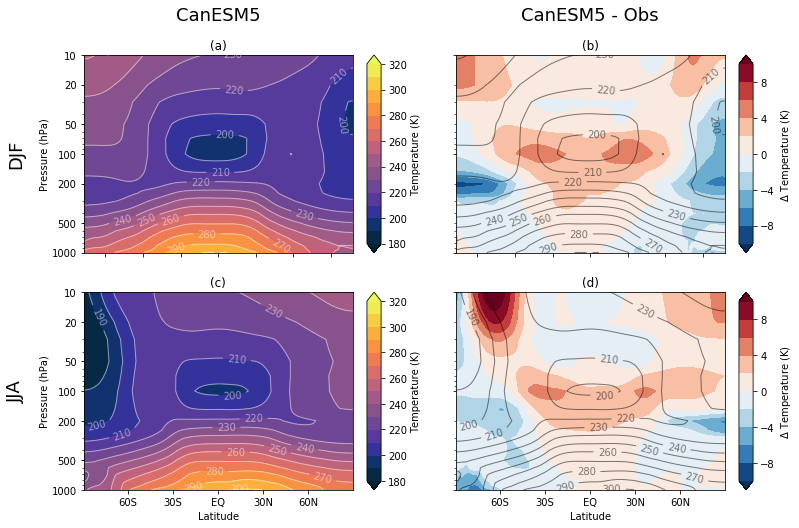

In [7]:
#seasonal plot - ta

fig = plt.figure(figsize=(12, 8), constrained_layout=False)

# gridspec inside gridspec
outer_grid = fig.add_gridspec(2, 2, wspace=0.25, hspace=0.2)


cmap=cmocean.cm.thermal
cmap.set_bad(cfeature.COLORS['land'])
levels1 = np.arange(180,321,10)
cmap2=plt.cm.RdBu_r
levels2 = np.arange(-10,11,2)


# plot the ta DJF
axt, axc = pltm.inner_gs(outer_grid[0], labely=True)
cb = axt.contourf(seasonal_zms['ta_zm_DJF'].lat, seasonal_zms['ta_zm_DJF'].plev, seasonal_zms['ta_zm_DJF'], cmap=cmap, levels = levels1, extend='both')
cntr = axt.contour(seasonal_zms['ta_zm_DJF'].lat, seasonal_zms['ta_zm_DJF'].plev, seasonal_zms['ta_zm_DJF'], levels = levels1, colors='w', linewidths=1, alpha=0.5)
axt.clabel(cntr,fmt='%1.0f')
axt.set_title('(a)')
axt.text(-0.25, 0.5, 'DJF', horizontalalignment='center', verticalalignment='center',rotation='vertical', fontsize=title_fontsize, transform=axt.transAxes)
axt.text(0.5, 1.2, 'CanESM5', horizontalalignment='center', verticalalignment='center', fontsize=title_fontsize, transform=axt.transAxes)
plt.colorbar(cb, cax=axc, extend='both', label =r'Temperature (K)')

# plot the ta JJA
axt, axc = pltm.inner_gs(outer_grid[2], labelx=True, labely=True)
cb = axt.contourf(seasonal_zms['ta_zm_JJA'].lat, seasonal_zms['ta_zm_JJA'].plev, seasonal_zms['ta_zm_JJA'], cmap=cmap, levels = levels1, extend='both')
cntr = axt.contour(seasonal_zms['ta_zm_JJA'].lat, seasonal_zms['ta_zm_JJA'].plev, seasonal_zms['ta_zm_JJA'], levels = levels1, colors='w', linewidths=1, alpha=0.5)
axt.clabel(cntr,fmt='%1.0f')
axt.set_title('(c)')
axt.text(-0.25, 0.5, 'JJA', horizontalalignment='center', verticalalignment='center',rotation='vertical', fontsize=title_fontsize, transform=axt.transAxes)
plt.colorbar(cb, cax=axc, extend='both', label =r'Temperature (K)')

# plot the ta anomaly DJF
axt, axc = pltm.inner_gs(outer_grid[1])
cb = axt.contourf(seasonal_zms['ta_obs_zm_DJF'].lat, seasonal_zms['ta_obs_zm_DJF'].plev,  seasonal_zms['ta_zm_DJF'] - seasonal_zms['ta_obs_zm_DJF'], cmap=cmap2, levels = levels2, extend='both')
cntr = axt.contour(seasonal_zms['ta_zm_DJF'].lat, seasonal_zms['ta_zm_DJF'].plev, seasonal_zms['ta_zm_DJF'], levels = levels1, colors='k', linewidths=1, alpha=0.5)
axt.clabel(cntr,fmt='%1.0f')
axt.set_title('(b)')
axt.text(0.5, 1.2, 'CanESM5 - Obs', horizontalalignment='center', verticalalignment='center', fontsize=title_fontsize, transform=axt.transAxes)
plt.colorbar(cb, cax=axc, extend='both', label='$\Delta$ Temperature (K)')

# plot the ta anomaly JJA
axt, axc = pltm.inner_gs(outer_grid[3], labelx=True)
cb = axt.contourf(seasonal_zms['ta_obs_zm_JJA'].lat, seasonal_zms['ta_obs_zm_JJA'].plev,  seasonal_zms['ta_zm_JJA'] - seasonal_zms['ta_obs_zm_JJA'], cmap=cmap2, levels = levels2, extend='both')
cntr = axt.contour(seasonal_zms['ta_zm_JJA'].lat, seasonal_zms['ta_zm_JJA'].plev, seasonal_zms['ta_zm_JJA'], levels = levels1, colors='k', linewidths=1, alpha=0.5)
axt.clabel(cntr,fmt='%1.0f')
axt.set_title('(d)')
plt.colorbar(cb, cax=axc, extend='both', label='$\Delta$ Temperature (K)')


fig.savefig('plots/fig-09_atmos_ta-sec-seasonal.png', bbox_inches='tight')
fig.savefig('plots/fig-09_atmos_ta-sec-seasonal.pdf', bbox_inches='tight')

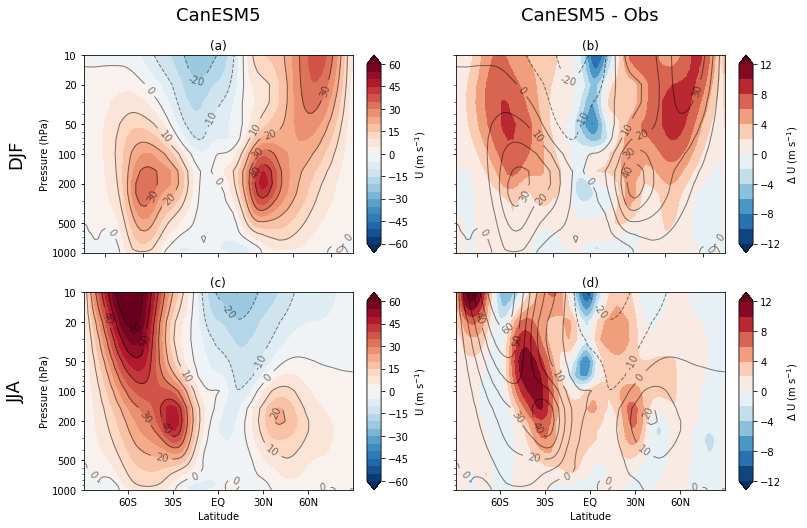

In [8]:
#seasonal plot - ua

fig = plt.figure(figsize=(12, 8), constrained_layout=False)

# gridspec inside gridspec
outer_grid = fig.add_gridspec(2, 2, wspace=0.25, hspace=0.2)

cmap=plt.cm.RdBu_r
cmap.set_bad(cfeature.COLORS['land'])
levels1 = np.arange(-60,61,5)
levels2 = np.arange(-12,13,2)

# plot the ua DJF
axt, axc = pltm.inner_gs(outer_grid[0], labely=True)
cb = axt.contourf(seasonal_zms['ua_zm_DJF'].lat, seasonal_zms['ua_zm_DJF'].plev, seasonal_zms['ua_zm_DJF'], cmap=cmap, levels = levels1,extend='both')
cntr = axt.contour(seasonal_zms['ua_zm_DJF'].lat, seasonal_zms['ua_zm_DJF'].plev, seasonal_zms['ua_zm_DJF'], levels=np.arange(-60,61,10), colors='k', linewidths=1, alpha=0.5)
axt.clabel(cntr,fmt='%1.0f')
axt.set_title('(a)')
axt.text(0.5, 1.2, 'CanESM5', horizontalalignment='center', verticalalignment='center', fontsize=title_fontsize, transform=axt.transAxes)
axt.text(-0.25, 0.5, 'DJF', horizontalalignment='center', verticalalignment='center',rotation='vertical', fontsize=title_fontsize, transform=axt.transAxes)
plt.colorbar(cb, cax=axc, extend='both', label=r'U (m s$^{-1}$)')

# plot the ua JJA
axt, axc = pltm.inner_gs(outer_grid[2], labelx=True, labely=True)
cb = axt.contourf(seasonal_zms['ua_zm_JJA'].lat, seasonal_zms['ua_zm_JJA'].plev, seasonal_zms['ua_zm_JJA'], cmap=cmap, levels = levels1,extend='both')
cntr = axt.contour(seasonal_zms['ua_zm_JJA'].lat, seasonal_zms['ua_zm_JJA'].plev, seasonal_zms['ua_zm_JJA'], levels=np.arange(-60,61,10), colors='k', linewidths=1, alpha=0.5)
axt.clabel(cntr,fmt='%1.0f')
axt.set_title('(c)')
axt.text(-0.25, 0.5, 'JJA', horizontalalignment='center', verticalalignment='center',rotation='vertical', fontsize=title_fontsize, transform=axt.transAxes)
plt.colorbar(cb, cax=axc, extend='both', label=r'U (m s$^{-1}$)')


# plot the ua anomaly DJF
axt, axc = pltm.inner_gs(outer_grid[1])
cb = axt.contourf(seasonal_zms['ua_obs_zm_DJF'].lat, seasonal_zms['ua_obs_zm_DJF'].plev, (seasonal_zms['ua_zm_DJF'] - seasonal_zms['ua_obs_zm_DJF']), cmap=cmap, levels = levels2,extend='both')
cntr = axt.contour(seasonal_zms['ua_zm_DJF'].lat, seasonal_zms['ua_zm_DJF'].plev, seasonal_zms['ua_zm_DJF'], levels=np.arange(-60,61,10), colors='k', linewidths=1, alpha=0.5)
axt.clabel(cntr,fmt='%1.0f')
axt.set_title('(b)')
axt.text(0.5, 1.2, 'CanESM5 - Obs', horizontalalignment='center', verticalalignment='center', fontsize=title_fontsize, transform=axt.transAxes)
plt.colorbar(cb, cax=axc, extend='both', label=r'$\Delta$ U (m s$^{-1}$)')


# plot the ua anomaly JJA
axt, axc = pltm.inner_gs(outer_grid[3], labelx=True)
cb = axt.contourf(seasonal_zms['ua_obs_zm_JJA'].lat, seasonal_zms['ua_obs_zm_JJA'].plev, (seasonal_zms['ua_zm_JJA'] - seasonal_zms['ua_obs_zm_JJA']), cmap=cmap, levels = levels2,extend='both')
cntr = axt.contour(seasonal_zms['ua_zm_JJA'].lat, seasonal_zms['ua_zm_JJA'].plev, seasonal_zms['ua_zm_JJA'], levels=np.arange(-60,61,10), colors='k', linewidths=1, alpha=0.5)
axt.clabel(cntr,fmt='%1.0f')
axt.set_title('(d)')
plt.colorbar(cb, cax=axc, extend='both', label=r'$\Delta$ U (m s$^{-1}$)')


fig.savefig('plots/fig-10_atmos_ua-sec-seasonal.png', bbox_inches='tight')
fig.savefig('plots/fig-10_atmos_ua-sec-seasonal.pdf', bbox_inches='tight')

In [ ]:
#get global time means and monthly data at fixed levels for stats

#global time means
global_means = {}
for ds, name in zip([ta,ua,ta_obs,ua_obs,ta_CanESM2,ua_CanESM2],['ta','ua','ta_obs','ua_obs','ta_CanESM2','ua_CanESM2']):
    print(name)
    plev500 = ds.sel(plev=500).mean('time')
    print('500 done', datetime.datetime.now())
    if 'CanESM2' in name:
        plev850 = None
        plev250 = None
    else:
        plev850 = ds.sel(plev=850).mean('time')
        print('850 done',datetime.datetime.now())
        plev250 = ds.sel(plev=250).mean('time')
        print('250 done',datetime.datetime.now())
        #plev850 = pltm.get_weighted_globalmean(ds.sel(plev=850), calendar, start, end)
        #plev250 = pltm.get_weighted_globalmean(ds.sel(plev=250), calendar, start, end)

    global_means[name] = {'plev850':plev850,'plev500':plev500,'plev250':plev250}

    
#monthly data
global_data = {}
for ds, name in zip([ta,ua,ta_obs,ua_obs,ta_CanESM2,ua_CanESM2],['ta','ua','ta_obs','ua_obs','ta_CanESM2','ua_CanESM2']):
    print(name)
    ds_selyears = ds.sel(time=slice(start,end))
    plev500 = ds_selyears.sel(plev=500).squeeze()
    if 'CanESM2' in name:
        plev850 = None
        plev250 = None
    else:
        plev850 = ds_selyears.sel(plev=850).squeeze()
        plev250 = ds_selyears.sel(plev=250).squeeze()

    global_data[name] = {'plev850':plev850,'plev500':plev500,'plev250':plev250}



In [ ]:
##### statistics - for global time means at fixed levels ****CanESM5****
xyzt = 'TTFF'
av_dims = ['time'] #dimensions over which to average (time for global time means, time and lon for zonal means and sections, )
weight  = xr.open_dataset('input_data/obs/woa/woa09_gridarea.nc')['cell_area']
calc_skill_score=True

#the following lists will be zipped for the stats calcs, so all info should be entered accordingly
model_names    = ['CanESM5','CanESM5','CanESM5','CanESM5','CanESM5','CanESM5']
model_datasets    = [global_means['ta']['plev250'], global_means['ta']['plev500'], global_means['ta']['plev850'],
                     global_means['ua']['plev250'], global_means['ua']['plev500'], global_means['ua']['plev850']]
model_fulldatasets= [global_data['ta']['plev250'], global_data['ta']['plev500'], global_data['ta']['plev850'],
                     global_data['ua']['plev250'], global_data['ua']['plev500'], global_data['ua']['plev850']]

obs_names     = ['ERA5','ERA5','ERA5','ERA5','ERA5','ERA5']
obs_datasets     = [global_means['ta_obs']['plev250'], global_means['ta_obs']['plev500'], global_means['ta_obs']['plev850'],
                    global_means['ua_obs']['plev250'], global_means['ua_obs']['plev500'], global_means['ua_obs']['plev850']]
obs_fulldatasets = [global_data['ta_obs']['plev250'], global_data['ta_obs']['plev500'], global_data['ta_obs']['plev850'],
                    global_data['ua_obs']['plev250'], global_data['ua_obs']['plev500'], global_data['ua_obs']['plev850']]

stats_names = ['ta250_global_timemean','ta500_global_timemean','ta850_global_timemean','ua250_global_timemean','ua500_global_timemean','ua850_global_timemean']
varslist = ['ta250', 'ta500','ta850','ua250', 'ua500','ua850']         


bst.calc_stats_and_write(obs_datasets, obs_fulldatasets, obs_names, model_datasets, model_fulldatasets, model_names, stats_names, varslist, weight, xyzt, av_dims, start, end, calc_skill_score=calc_skill_score)

In [ ]:
##### statistics - for global time means at fixed levels ****CanESM2****
xyzt = 'TTFF'
av_dims = ['time'] #dimensions over which to average (time for global time means, time and lon for zonal means and sections, )
weight  = xr.open_dataset('input_data/obs/woa/woa09_gridarea.nc')['cell_area']
calc_skill_score=True

#the following lists will be zipped for the stats calcs, so all info should be entered accordingly
model_names    = ['CanESM2','CanESM2']
model_datasets    = [global_means['ta_CanESM2']['plev500'], global_means['ua_CanESM2']['plev500']]
model_fulldatasets= [global_data['ta_CanESM2']['plev500'], global_data['ua_CanESM2']['plev500']]

obs_names     = ['ERA5','ERA5']
obs_datasets     = [global_means['ta_obs']['plev500'], global_means['ua_obs']['plev500']]
obs_fulldatasets = [global_data['ta_obs']['plev500'], global_data['ua_obs']['plev500']]

stats_names = ['ta500_global_timemean_CanESM2','ua500_global_timemean_CanESM2']
varslist = ['ta500','ua500']         


bst.calc_stats_and_write(obs_datasets, obs_fulldatasets, obs_names, model_datasets, model_fulldatasets, model_names, stats_names, varslist, weight, xyzt, av_dims, start, end, calc_skill_score=calc_skill_score)

In [9]:
#for full datasets - select only those months used for the seasonal zonal means

#mrthods to create a boolean mask for selecting by month
def is_djf(month):
    return (month <= 2) | (month == 12)

def is_jja(month):
    return (month >= 6) & (month <= 8)


ta_djf = ta.sel(time=is_djf(ta['time.month']))
ua_djf = ua.sel(time=is_djf(ua['time.month']))

ta_jja = ta.sel(time=is_jja(ta['time.month']))
ua_jja = ua.sel(time=is_jja(ua['time.month']))

ta_CanESM2_djf = ta_CanESM2.sel(time=is_djf(ta_CanESM2['time.month']))
ua_CanESM2_djf = ua_CanESM2.sel(time=is_djf(ua_CanESM2['time.month']))

ta_CanESM2_jja = ta_CanESM2.sel(time=is_jja(ta_CanESM2['time.month']))
ua_CanESM2_jja = ua_CanESM2.sel(time=is_jja(ua_CanESM2['time.month']))


ta_obs_djf = ta_obs.sel(time=is_djf(ta_obs['time.month']))
ua_obs_djf = ua_obs.sel(time=is_djf(ua_obs['time.month']))

ta_obs_jja = ta_obs.sel(time=is_jja(ta_obs['time.month']))
ua_obs_jja = ua_obs.sel(time=is_jja(ua_obs['time.month']))


In [ ]:
##### statistics - for seasonal zonal means ******ta*********
#weight for plevels (from James: "I'd suggest weighting by pressure. But this is a subjective choice, so make it clear on the plots that this has been done. 
#But it might be more useful to calculate a spatial correlation (or whichever metric) separately at each vertical level and show a vertical profile of the metric.")

xyzt = 'FTTF'
av_dims = ['time','lon'] #dimensions over which to average (time for 1D global time means, time and lon for zonal means and sections, )
weight = np.tile(seasonal_zms['ta_zm_DJF'].plev,(180,1)).transpose()
calc_skill_score = True

#the following lists will be zipped for the stats calcs, so all info should be entered accordingly
model_names    = ['CanESM5','CanESM5',
                  'CanESM2','CanESM2',]
model_datasets    = [seasonal_zms['ta_zm_DJF'],seasonal_zms['ta_zm_JJA'],
                     seasonal_zms['ta_CanESM2_zm_DJF'],seasonal_zms['ta_CanESM2_zm_JJA']]
model_fulldatasets = [ta_djf, ta_jja, ta_CanESM2_djf, ta_CanESM2_jja]
 
obs_names    = ['ERA5','ERA5','ERA5','ERA5',]
obs_datasets    = [seasonal_zms['ta_obs_zm_DJF'],seasonal_zms['ta_obs_zm_JJA'],
                   seasonal_zms['ta_obs_zm_DJF'],seasonal_zms['ta_obs_zm_JJA']]
obs_fulldatasets = [ta_obs_djf, ta_obs_jja, 
                    ta_obs_djf, ta_obs_jja]

stats_names = ['taDJF_zonal_timemean','taJJA_zonal_timemean',
               'taDJF_zonal_timemean_CanESM2','taJJAzonal_timemean_CanESM2'] #names for json file
varslist = ['taDJF','taJJA','taDJF','taJJA']


bst.calc_stats_and_write(obs_datasets, obs_fulldatasets, obs_names, model_datasets, model_fulldatasets, model_names, stats_names, varslist, weight, xyzt, av_dims, start, end, calc_skill_score=calc_skill_score)

In [ ]:
##### statistics - for seasonal zonal means ******ua*********
#weight for plevels (from James: "I'd suggest weighting by pressure. But this is a subjective choice, so make it clear on the plots that this has been done. 
#But it might be more useful to calculate a spatial correlation (or whichever metric) separately at each vertical level and show a vertical profile of the metric.")

xyzt = 'FTTF'
av_dims = ['time','lon'] #dimensions over which to average (time for 1D global time means, time and lon for zonal means and sections, )
weight = np.tile(seasonal_zms['ua_zm_DJF'].plev,(180,1)).transpose()
calc_skill_score = True

#the following lists will be zipped for the stats calcs, so all info should be entered accordingly
model_names    = ['CanESM5','CanESM5',
                  'CanESM2','CanESM2',]
model_datasets    = [seasonal_zms['ua_zm_DJF'],seasonal_zms['ua_zm_JJA'],
                     seasonal_zms['ua_CanESM2_zm_DJF'],seasonal_zms['ua_CanESM2_zm_JJA']]
model_fulldatasets = [ua_djf, ua_jja, ua_CanESM2_djf, ua_CanESM2_jja]
 
obs_names    = ['ERA5','ERA5','ERA5','ERA5',]
obs_datasets    = [seasonal_zms['ua_obs_zm_DJF'],seasonal_zms['ua_obs_zm_JJA'],
                   seasonal_zms['ua_obs_zm_DJF'],seasonal_zms['ua_obs_zm_JJA']]
obs_fulldatasets = [ua_obs_djf, ua_obs_jja, 
                    ua_obs_djf, ua_obs_jja]

stats_names = ['uaDJF_zonal_timemean','uaJJA_zonal_timemean',
               'uaDJF_zonal_timemean_CanESM2','uaJJAzonal_timemean_CanESM2'] #names for json file
varslist = ['uaDJF','uaJJA','uaDJF','uaJJA']


bst.calc_stats_and_write(obs_datasets, obs_fulldatasets, obs_names, model_datasets, model_fulldatasets, model_names, stats_names, varslist, weight, xyzt, av_dims, start, end, calc_skill_score=calc_skill_score)

In [ ]:
##### statistics - for seasonal  3D timemean ******ta*********
#weight for plevels (from James: "I'd suggest weighting by pressure. But this is a subjective choice, so make it clear on the plots that this has been done. 
#But it might be more useful to calculate a spatial correlation (or whichever metric) separately at each vertical level and show a vertical profile of the metric.")

#weights
plevs = seasonal_zms['ta_zm_DJF'].plev
plev_weights = np.tile(np.tile(plevs,(180,1)),(360,1,1))

gridcellareas =  xr.open_dataset('input_data/obs/woa/woa09_gridarea.nc')['cell_area'].values
gridcellaarea_weights = np.tile(gridcellareas,(19,1,1))
gridcellaarea_weights_t = gridcellaarea_weights.transpose()

gridvolume_weights = plev_weights*gridcellaarea_weights_t



xyzt = 'TTTF'
av_dims = ['time'] #dimensions over which to average (time for global time means, time and lon for zonal means and sections)
weight = gridvolume_weights
calc_skill_score = True

#the following lists will be zipped for the stats calcs, so all info should be entered accordingly
model_names    = ['CanESM5','CanESM5',
                  'CanESM2','CanESM2',]
model_datasets    = [ta_djf.mean('time'),ta_jja.mean('time'),
                     ta_CanESM2_djf.mean('time'), ta_CanESM2_jja.mean('time')]
model_fulldatasets = [ta_djf, ta_jja, ta_CanESM2_djf, ta_CanESM2_jja]
 
obs_names    = ['ERA5','ERA5','ERA5','ERA5',]
obs_datasets    = [ta_obs_djf.mean('time'), ta_obs_jja.mean('time'),
                   ta_obs_djf.mean('time'), ta_obs_jja.mean('time')]
obs_fulldatasets = [ta_obs_djf, ta_obs_jja, 
                    ta_obs_djf, ta_obs_jja]

stats_names = ['taDJF_3D_timemean','taJJA_3D_timemean',
               'taDJF_3D_timemean_CanESM2','taJJA_3D_timemean_CanESM2'] #names for json file
varslist = ['taDJF','taJJA','taDJF','taJJA']


bst.calc_stats_and_write(obs_datasets, obs_fulldatasets, obs_names, model_datasets, model_fulldatasets, model_names, stats_names, varslist, weight, xyzt, av_dims, start, end, calc_skill_score=calc_skill_score)

In [ ]:
##### statistics - for seasonal  3D timemean ******ua*********
#weight for plevels (from James: "I'd suggest weighting by pressure. But this is a subjective choice, so make it clear on the plots that this has been done. 
#But it might be more useful to calculate a spatial correlation (or whichever metric) separately at each vertical level and show a vertical profile of the metric.")

#weights
plevs = seasonal_zms['ua_zm_DJF'].plev
plev_weights = np.tile(np.tile(plevs,(180,1)),(360,1,1))

gridcellareas =  xr.open_dataset('input_data/obs/woa/woa09_gridarea.nc')['cell_area'].values
gridcellaarea_weights = np.tile(gridcellareas,(17,1,1))
gridcellaarea_weights_t = gridcellaarea_weights.transpose()

gridvolume_weights = plev_weights*gridcellaarea_weights_t



xyzt = 'TTTF'
av_dims = ['time'] #dimensions over which to average (time for global time means, time and lon for zonal means and sections)
weight = gridvolume_weights
calc_skill_score = True

#the following lists will be zipped for the stats calcs, so all info should be entered accordingly
model_names    = ['CanESM5','CanESM5',
                  'CanESM2','CanESM2',]
model_datasets    = [ua_djf.mean('time'),ua_jja.mean('time'),
                     ua_CanESM2_djf.mean('time'), ua_CanESM2_jja.mean('time')]
model_fulldatasets = [ua_djf, ua_jja, ua_CanESM2_djf, ua_CanESM2_jja]
 
obs_names    = ['ERA5','ERA5','ERA5','ERA5',]
obs_datasets    = [ua_obs_djf.mean('time'), ua_obs_jja.mean('time'),
                   ua_obs_djf.mean('time'), ua_obs_jja.mean('time')]
obs_fulldatasets = [ua_obs_djf, ua_obs_jja, 
                    ua_obs_djf, ua_obs_jja]

stats_names = ['uaDJF_3D_timemean','uaJJA_3D_timemean',
               'uaDJF_3D_timemean_CanESM2','uaJJA_3D_timemean_CanESM2'] #names for json file
varslist = ['uaDJF','uaJJA','uaDJF','uaJJA']


bst.calc_stats_and_write(obs_datasets, obs_fulldatasets, obs_names, model_datasets, model_fulldatasets, model_names, stats_names, varslist, weight, xyzt, av_dims, start, end, calc_skill_score=calc_skill_score)

In [ ]:
##### statistics - for full 3D timemean ******ta*********
#weight for plevels (from James: "I'd suggest weighting by pressure. But this is a subjective choice, so make it clear on the plots that this has been done. 
#But it might be more useful to calculate a spatial correlation (or whichever metric) separately at each vertical level and show a vertical profile of the metric.")

#weights
plevs = ta.plev
plev_weights = np.tile(np.tile(plevs,(180,1)),(360,1,1))

gridcellareas =  xr.open_dataset('input_data/obs/woa/woa09_gridarea.nc')['cell_area'].values
gridcellaarea_weights = np.tile(gridcellareas,(len(plevs),1,1))
gridcellaarea_weights_t = gridcellaarea_weights.transpose()

gridvolume_weights = plev_weights*gridcellaarea_weights_t

xyzt = 'TTTF'
av_dims = ['time'] #dimensions over which to average (time for global time means, time and lon for zonal means and sections)
weight = gridvolume_weights
calc_skill_score = True

#the following lists will be zipped for the stats calcs, so all info should be entered accordingly
model_names    = ['CanESM5','CanESM2',]
model_datasets    = [ta.mean('time'), ta_CanESM2.mean('time')]
model_fulldatasets = [ta, ta_CanESM2]
 
obs_names    = ['ERA5','ERA5',]
obs_datasets    = [ta_obs.mean('time'), ta_obs.mean('time')]
obs_fulldatasets = [ta_obs, ta_obs]

stats_names = ['ta_3D_timemean','ta_3D_timemean_CanESM2'] #names for json file
varslist = ['ta','ta']


bst.calc_stats_and_write(obs_datasets, obs_fulldatasets, obs_names, model_datasets, model_fulldatasets, model_names, stats_names, varslist, weight, xyzt, av_dims, start, end, calc_skill_score=calc_skill_score)

In [ ]:
##### statistics - for full 3D timemean ******ua*********
#weight for plevels (from James: "I'd suggest weighting by pressure. But this is a subjective choice, so make it clear on the plots that this has been done. 
#But it might be more useful to calculate a spatial correlation (or whichever metric) separately at each vertical level and show a vertical profile of the metric.")

#weights
plevs = ua.plev
plev_weights = np.tile(np.tile(plevs,(180,1)),(360,1,1))

gridcellareas =  xr.open_dataset('input_data/obs/woa/woa09_gridarea.nc')['cell_area'].values
gridcellaarea_weights = np.tile(gridcellareas,(len(plevs),1,1))
gridcellaarea_weights_t = gridcellaarea_weights.transpose()

gridvolume_weights = plev_weights*gridcellaarea_weights_t


xyzt = 'TTTF'
av_dims = ['time'] #dimensions over which to average (time for global time means, time and lon for zonal means and sections)
weight = gridvolume_weights
calc_skill_score = True

#the following lists will be zipped for the stats calcs, so all info should be entered accordingly
model_names    = ['CanESM5','CanESM2',]
model_datasets    = [ua.mean('time'), ua_CanESM2.mean('time')]
model_fulldatasets = [ua, ua_CanESM2]
 
obs_names    = ['ERA5','ERA5',]
obs_datasets    = [ua_obs.mean('time'), ua_obs.mean('time')]
obs_fulldatasets = [ua_obs, ua_obs]

stats_names = ['ua_3D_timemean','ua_3D_timemean_CanESM2'] #names for json file
varslist = ['ua','ua']


bst.calc_stats_and_write(obs_datasets, obs_fulldatasets, obs_names, model_datasets, model_fulldatasets, model_names, stats_names, varslist, weight, xyzt, av_dims, start, end, calc_skill_score=calc_skill_score)

In [ ]:
##### statistics - for full 3D timemean ******va*********
#weight for plevels (from James: "I'd suggest weighting by pressure. But this is a subjective choice, so make it clear on the plots that this has been done. 
#But it might be more useful to calculate a spatial correlation (or whichever metric) separately at each vertical level and show a vertical profile of the metric.")

#weights
plevs = va.plev
plev_weights = np.tile(np.tile(plevs,(180,1)),(360,1,1))

gridcellareas =  xr.open_dataset('input_data/obs/woa/woa09_gridarea.nc')['cell_area'].values
gridcellaarea_weights = np.tile(gridcellareas,(len(plevs),1,1))
gridcellaarea_weights_t = gridcellaarea_weights.transpose()

gridvolume_weights = plev_weights*gridcellaarea_weights_t


xyzt = 'TTTF'
av_dims = ['time'] #dimensions over which to average (time for global time means, time and lon for zonal means and sections)
weight = gridvolume_weights
calc_skill_score = True

#the following lists will be zipped for the stats calcs, so all info should be entered accordingly
model_names    = ['CanESM5','CanESM2',]
model_datasets    = [va.mean('time'), va_CanESM2.mean('time')]
model_fulldatasets = [va, va_CanESM2]
 
obs_names    = ['ERA5','ERA5',]
obs_datasets    = [va_obs.mean('time'), va_obs.mean('time')]
obs_fulldatasets = [va_obs, va_obs]

stats_names = ['va_3D_timemean','va_3D_timemean_CanESM2'] #names for json file
varslist = ['va','va']


bst.calc_stats_and_write(obs_datasets, obs_fulldatasets, obs_names, model_datasets, model_fulldatasets, model_names, stats_names, varslist, weight, xyzt, av_dims, start, end, calc_skill_score=calc_skill_score)

In [ ]:
##### statistics - for full 3D timemean ******zg*********
#weight for plevels (from James: "I'd suggest weighting by pressure. But this is a subjective choice, so make it clear on the plots that this has been done. 
#But it might be more useful to calculate a spatial correlation (or whichever metric) separately at each vertical level and show a vertical profile of the metric.")

#weights
plevs = zg.plev
plev_weights = np.tile(np.tile(plevs,(180,1)),(360,1,1))

gridcellareas =  xr.open_dataset('input_data/obs/woa/woa09_gridarea.nc')['cell_area'].values
gridcellaarea_weights = np.tile(gridcellareas,(len(plevs),1,1))
gridcellaarea_weights_t = gridcellaarea_weights.transpose()

gridvolume_weights = plev_weights*gridcellaarea_weights_t


xyzt = 'TTTF'
av_dims = ['time'] #dimensions over which to average (time for global time means, time and lon for zonal means and sections)
weight = gridvolume_weights
calc_skill_score = True

#the following lists will be zipped for the stats calcs, so all info should be entered accordingly
model_names    = ['CanESM5','CanESM2',]
model_datasets    = [zg.mean('time'), zg_CanESM2.mean('time')]
model_fulldatasets = [zg, zg_CanESM2]
 
obs_names    = ['ERA5','ERA5',]
obs_datasets    = [zg_obs.mean('time'), zg_obs.mean('time')]
obs_fulldatasets = [zg_obs, zg_obs]

stats_names = ['zg_3D_timemean','zg_3D_timemean_CanESM2'] #names for json file
varslist = ['zg','zg']


bst.calc_stats_and_write(obs_datasets, obs_fulldatasets, obs_names, model_datasets, model_fulldatasets, model_names, stats_names, varslist, weight, xyzt, av_dims, start, end, calc_skill_score=calc_skill_score)